# Nonlinear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Curve fitting using SciPy curve_fit 
- Use non-linear least squares to fit a function, f, to data.
- Assumes ydata = f(xdata, *params) + eps.
- returns popt (optimal values), pcov(estimated covariance of popt)

In [8]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

[2.55423706 1.35190947 0.47450618]
[2.43708906 1.         0.35015434]


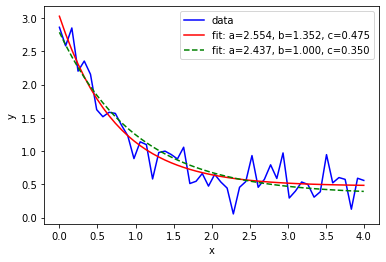

In [14]:
# data generation 
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

# Fit for the parameters a, b, c of the function func:
popt, pcov = curve_fit(func, xdata, ydata)
print(popt)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# Constrain the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
print(popt)
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Nonlinear regression

Text(0.5, 1.0, 'Non Linear Data')

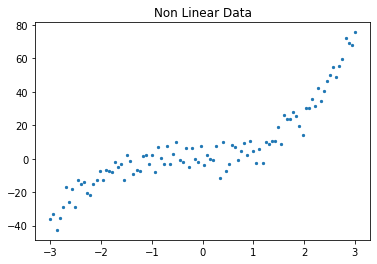

In [158]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score 

x = np.linspace(-3,3,100)
y = 2.1 * x**3 + 2.1 * x**2 + 1.4 * x + 0.9
y = y + np.random.randn(100) * 5.2

plt.scatter(x, y, s = 5) 
plt.title('Non Linear Data')

w: [12.23013834] b: 6.740709346155914
MSE:  124.17122583818363 R2 score:  0.7866346594435024


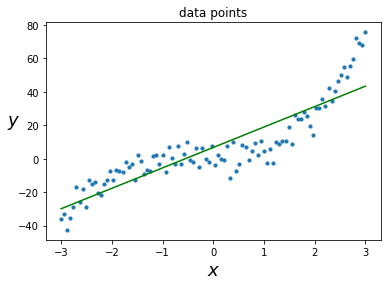

In [159]:
lrg = LinearRegression() 
lrg.fit(x.reshape(-1,1), y) 
print('w:', lrg.coef_, 'b:', lrg.intercept_) 
y_pred = lrg.predict(x.reshape(-1,1)) 
plt.scatter(x, y, s = 10) 
plt.xlabel("$x$", fontsize = 18) 
plt.ylabel("$y$", rotation = 0, fontsize = 18) 
plt.title("data points") 
plt.plot(x, y_pred, color ='g') 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2)

In [160]:
# now we make the model bit complex, e.g. degrees 2, and proceed with linear regression

poly_f = PolynomialFeatures(degree = 2, include_bias = False) 
x_poly = poly_f.fit_transform(x.reshape(-1,1)) 
x[:5], x_poly[:5]   # one more column for square of x introduced

(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576]),
 array([[-3.        ,  9.        ],
        [-2.93939394,  8.64003673],
        [-2.87878788,  8.28741965],
        [-2.81818182,  7.94214876],
        [-2.75757576,  7.60422406]]))

w: [12.23013834  2.0005213 ] b: 0.6179017292051583
MSE:  94.18920555219944 R2 score:  0.8381532292708422


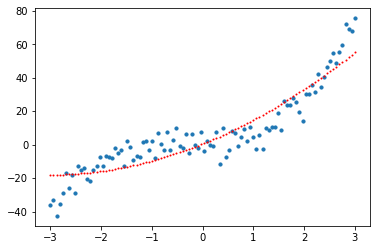

In [161]:
lrg = LinearRegression() 
lrg.fit(x_poly, y) 
print('w:', lrg.coef_, 'b:', lrg.intercept_) 
y_pred = lrg.predict(x_poly) 
plt.scatter(x, y, s = 10) 
plt.scatter(x, y_pred, c ='r', s=1) 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2)

In [162]:
# try degree 3
poly_f = PolynomialFeatures(degree = 3, include_bias = False) 
x_poly = poly_f.fit_transform(x.reshape(-1,1)) 
x[0], x_poly[0]   # more columns introduced

(-3.0, array([ -3.,   9., -27.]))

w: [1.42461155 2.0005213  1.96166083] b: 0.6179017292051547
MSE:  26.178399752754203 R2 score:  0.9550172502464502


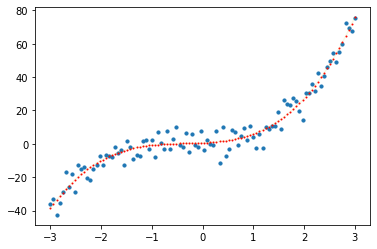

In [163]:
lrg = LinearRegression() 
lrg.fit(x_poly, y) 
print('w:', lrg.coef_, 'b:', lrg.intercept_) 
y_pred = lrg.predict(x_poly) 
plt.scatter(x, y, s = 10) 
plt.scatter(x, y_pred, c ='r', s=1) 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2)

# exactly the same as y_pred
a, b, c = lrg.coef_[2], lrg.coef_[1], lrg.coef_[0]
xx = np.linspace(-3,3,100)
yy = a * xx**3 + b * x**2 + c *x + lrg.intercept_
plt.plot(xx, yy, c='y', alpha=0.1)

MSE:  27.54885550084708 R2 score:  0.9526623749084995


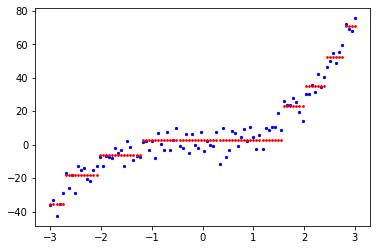

In [171]:
from sklearn.tree import DecisionTreeRegressor
lrg = DecisionTreeRegressor(max_depth=3) 
lrg.fit(x_poly, y) 

y_pred = lrg.predict(x_poly) 
plt.scatter(x, y, c='b', s = 5) 
plt.scatter(x, y_pred, c ='r', s=3) 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2)

MSE:  26.14365187864415 R2 score:  0.9550769580567183


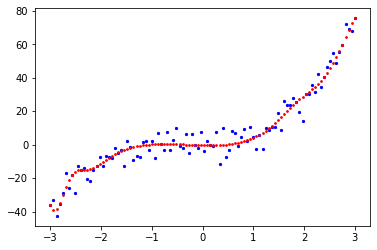

In [173]:
from sklearn.svm import SVR
lrg = SVR(C=1000) 
lrg.fit(x_poly, y) 

y_pred = lrg.predict(x_poly) 
plt.scatter(x, y, c='b', s = 5) 
plt.scatter(x, y_pred, c ='r', s=3) 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2)